In [76]:
# Explore one dimentional data

from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    # The math. floor() method rounds a number DOWN to the nearest integer, if necessary, and returns the result
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Bucket the point and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

[68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235, 81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653, -37.970486136133474, 45.96634965202574, 79.7676575935987, 36.79678638308826, -5.571456909457325, -79.85975838632683, -13.165632909243257, 22.177394688760316, 82.60221064757965, 93.32127355415176, -4.5980446894566, 73.061985554328, -47.90153792160812, 61.005565402604475, 9.739860767117861, -97.19165996719622, 43.94093728079082, -20.235291555146247, 64.96899542964661, 33.63064024637018, -99.77143613711435, -1.284426706935065, 73.52055509855617, -51.2178246225736, -34.95912745052199, 74.09424642173093, -61.78658169952189, 13.50214812413438, -52.27681427695596, 93.50805005802866, 60.63589385597402, -10.4

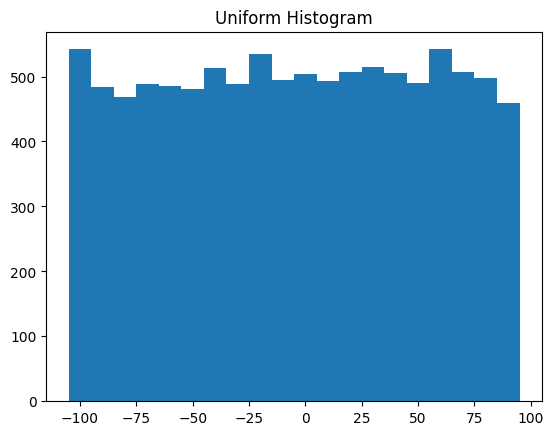

In [77]:
import random
from ipynb.fs.full.Chapter_6 import inverse_normal_cdf

# random. seed(0) sets the random seed to 0, so the pseudo random numbers you get from random will start from the same point.
random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

print(uniform)
print(normal)

plot_histogram(uniform, 10, "Uniform Histogram")

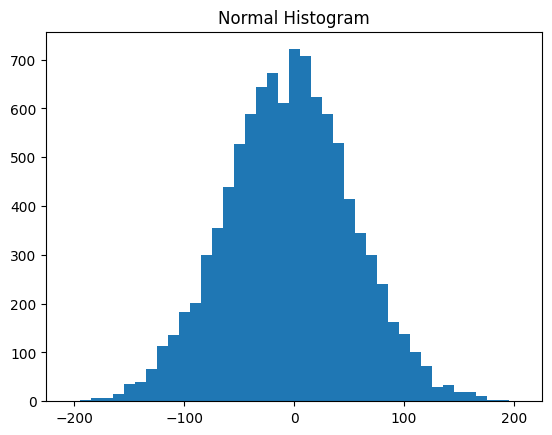

In [78]:
plot_histogram(normal, 10, "Normal Histogram")

0.2189159393310547
[-0.5221271514892578, -0.27518272399902344, 0.5436038970947266, -0.03283500671386719, 2.1323299407958984, -0.7730770111083984, 0.5921840667724609, -0.6050968170166016, -1.1173343658447266, -1.761789321899414, -0.2959728240966797, -1.101388931274414, 1.3263416290283203, 1.5264415740966797, 0.2241802215576172, -0.19942283630371094, 0.05705833435058594, -0.3956317901611328, 0.0031757354736328125, 0.18227577209472656, 0.9667873382568359, -0.9165668487548828, 1.1913776397705078, -0.22850990295410156, 1.2807178497314453, -0.6016254425048828, 0.48310279846191406, -0.9629344940185547, 0.7273578643798828, -1.1349010467529297, -0.2194690704345703, -0.8298778533935547, 1.988210678100586, 0.09402275085449219, -0.9430408477783203, -0.2164173126220703, -1.3148021697998047, -0.6201839447021484, -1.1651325225830078, 1.1763858795166016, 1.0527515411376953, 0.010061264038085938, 0.5023288726806641, -0.8736705780029297, -2.250852584838867, -0.8388996124267578, -0.20804405212402344, 0.3

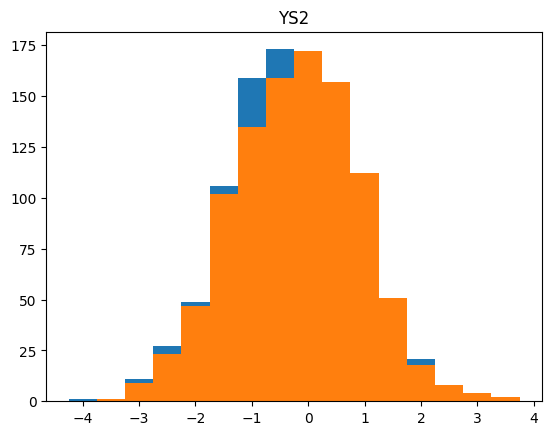

In [79]:
# Two dimension

def random_normal() -> float:
    """Returns a random draw from a stardard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

print(random_normal())
print(xs)
print(ys1)
print(ys2)
plot_histogram(ys1, 0.5, "YS1")
plot_histogram(ys2, 0.5, "YS2")

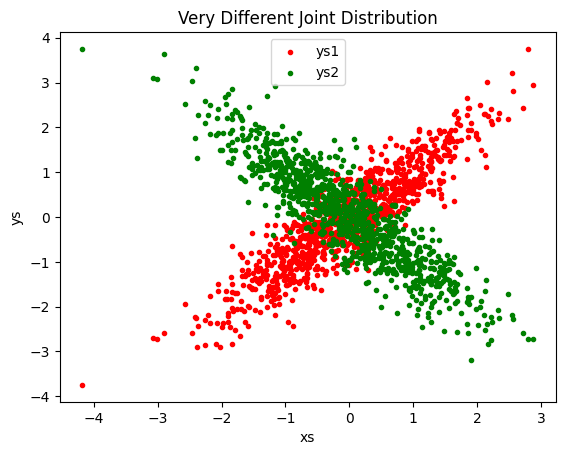

In [80]:
plt.scatter(xs, ys1, marker='.', color='red', label='ys1')
plt.scatter(xs, ys2, marker='.', color='green', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distribution")
plt.show()

In [81]:
from ipynb.fs.full.Chapter_5 import correlation

print(correlation(xs, ys1))
print(correlation(xs, ys2))

0.9010493686379609
-0.8920981526880033


In [82]:
# Many Dimensions

from ipynb.fs.full.Chapter_4 import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

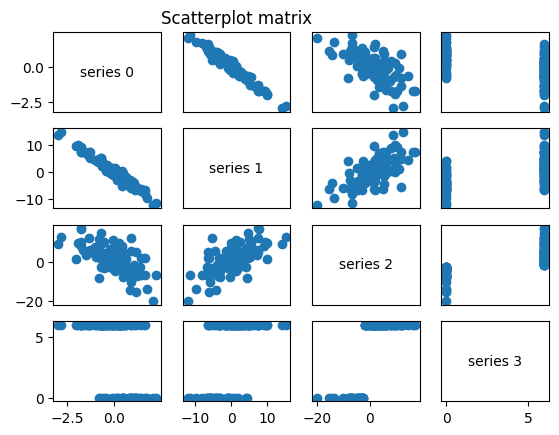

In [83]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]
corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j:
            ax[i][j].scatter(corr_data[j], corr_data[i])

        # Unless i == j, in which case show the series name
        else:
            ax[i][j].annotate("series " + str(i), (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1:
            ax[i][j].xaxis.set_visible(False)

        if j > 0:
            ax[i][j].yaxis.set_visible(False)

ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
ax[0][1].set_title("Scatterplot matrix")
plt.show()

In [84]:
# Using NamedTuples

import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}
print(stock_price['closing_price'])

102.06


In [85]:
from collections import namedtuple

# prices: Dict[datetime.date, float] = {}
StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

print(price.symbol)
print(price.closing_price)

MSFT
106.03


In [86]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

print(price.symbol)
print(price.closing_price)
print(price.is_high_tech())

MSFT
106.03
True


In [87]:
# Dataclasses

from dataclasses import dataclass

@dataclass
class StockPrice2:
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03)

print(price2.symbol)
print(price2.closing_price)
print(price2.is_high_tech())

MSFT
106.03
True


In [88]:
price2.closing_price /= 2
print(price2.closing_price)

53.015


In [89]:
# Cleaning and Munging

# closing_price = float(row[2])

from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol, date=parse(date).date(), closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

print(stock.symbol)
print(stock.date)
print(stock.closing_price)

MSFT
2018-12-14
106.03


In [90]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

print(try_parse_row(["MSFT0", "2018-12-14", "106.03"]))
print(try_parse_row(["MSFT", "2018-12--14", "106.03"]))
print(try_parse_row(["MSFT", "2018-12-14", "x"]))
print(try_parse_row(["MSFT", "2018-12-14", "106.03"]))

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good.
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock


None
None
None
StockPrice(symbol='MSFT', date=datetime.date(2018, 12, 14), closing_price=106.03)


In [91]:
# from dateutil.parser import parse
# import csv

# with open("stocks.csv", "r") as f:
#     reader = csv.DictReader(f)
#     rows = [[row['Symbol'], row['Date'], row['Close']]
#             for row in reader]

# # skip header
# maybe_data = [try_parse_row(row) for row in rows]

# # Make sure they all loaded successfully:
# assert maybe_data
# assert all(sp is not None for sp in maybe_data)

# # This is just to make mypy happy
# data = [sp for sp in maybe_data if sp is not None]

In [92]:
# import csv

# data: List[StockPrice] = []

# with open("comma_delimited_stock_prices.txt") as f:
#     reader = csv.reader(f)
#     for row in reader:
#         maybe_stock = try_parse_row(row)
#         if maybe_stock is None:
#             print(f"skipping invalid row: {row}")
#         else:
#             data.append(maybe_stock)

In [93]:
# data = [
#     StockPrice(symbol='AAPL',
#                date=datetime.date(2018, 12, 24),
#                closing_price=106.03),

#     #..
# ]

# max_aapl_price = max(stock_price.closing_price for stock_price in data if stock_price.symbol == "AAPL")
# print(max_aapl_price)

# appl = data["Symbol"]== "AAPL"
# max(list(data[appl]["Close"]))

In [94]:
from dateutil.parser import parse
import pandas as pd
import io
import requests
url = "https://raw.githubusercontent.com/arityo182/Data-science-from-scratch/refs/heads/main/file%20ipynb/stocks.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

appl = data["Symbol"]== "AAPL"
max(list(data[appl]["Close"]))

232.070007

In [95]:
# from collections import defaultdict

# max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

# for sp in data:
#     symbol, closing_price = sp.symbol, sp.closing_price
#     if closing_price > max_prices[symbol]:
#         max_prices[symbol] = closing_price
# max_prices

appl = data["Symbol"]== "AAPL" #找出data中「Symbol」欄位是 "AAPL" 的篩選器
print("AAPL:",max(list(data[appl]["Close"])))

msft = data["Symbol"]== "MSFT" #找出data中「Symbol」欄位是 "MSFT" 的篩選器
print("MSFT:",max(list(data[msft]["Close"])))

goog = data["Symbol"]== "GOOG" #找出data中「Symbol」欄位是 "GOOG" 的篩選器
print("GOOG:",max(list(data[goog]["Close"])))

fb = data["Symbol"]== "FB" #找出data中「Symbol」欄位是 "FB" 的篩選器
print("FB:",max(list(data[fb]["Close"])))

AAPL: 232.070007
MSFT: 115.610001
GOOG: 1268.329956
FB: 217.5


In [96]:
# from typing import List
# from collections import defaultdict

# # Collect the prices by symbol
# prices: Dict[str, List[StockPrice]] = defaultdict(list)

# for sp in data:
#     prices[sp.symbol].append(sp)

# # Order the prices by date
# prices = {symbol: sorted(symbol_prices) for symbol, symbol_prices in prices.items()}

# def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
#     return today.closing_price / yesterday.closing_price - 1

# class DailyChange(NamedTuple):
#     symbol: str
#     date: datetime.date
#     pct_change: float

# def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
#     """Assumes prices are for once stock and are ordered"""
#     return [DailyChange(symbol = today.symbol,
#                            date = today.date,
#                            pct_change = pct_change(yesterday, today))
#             for yesterday, today in zip(prices, prices[1:])]

# all_changes = [change for symbol_prices in prices.values()
#               for change in day_over_day_changes(symbol_prices)]
# max_change = max(all_changes, key = lambda change: change.pct_change)
# # see, e.g. http://news.cnet.com/2100-1001-202143.html
# # assert max_change.symbol == 'AAPL'
# # assert max_change.date == datetime.date(1997, 8, 6)
# # assert 0.33 < max_change.pct_change < 0.34

# min_change = min(all_changes, key=lambda change: change.pct_change)
# # see, e.g. http://money.cnn.com/2000/09/29/markets/techwrap/
# # assert min_change.symbol == 'AAPL'
# # assert min_change.date == datetime.date(2000, 9, 29)
# # assert -0.52 < min_change.pct_change < -0.51

# changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

# for change in all_changes:
#     changes_by_month[change.date.month].append(change)

# avg_daily_change = {
#     month: sum(change.pct_change for change in changes) / len(changes)
#     for month, changes in changes_by_month.items()
# }

# # October is the best month
# assert avg_daily_change[10] == max(avg_daily_change.values())


In [97]:
# Rescaling

from ipynb.fs.full.Chapter_4 import distance

a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

In [98]:
from typing import Tuple

from ipynb.fs.full.Chapter_4 import vector_mean
from ipynb.fs.full.Chapter_5 import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """Returns the mean and standart deviation for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data]) for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
print(means)
print(stdevs)

[-1.0, 0.0, 1.0]
[2.0, 1.0, 0.0]


In [99]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has mean 0 and standard
    deviation 1. (Leaves  a position as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
print(means)
print(stdevs)

[0.0, 0.0, 1.0]
[1.0, 1.0, 0.0]


In [100]:
# Tqdm

import tqdm

for i in tqdm.tqdm(range(100)):
    # do sommething slow
    _ = [random.random() for _ in range(10000)]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 809.89it/s]


In [101]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(100_00)

1229 primes: 100%|██████████| 9997/9997 [00:07<00:00, 1253.36it/s]


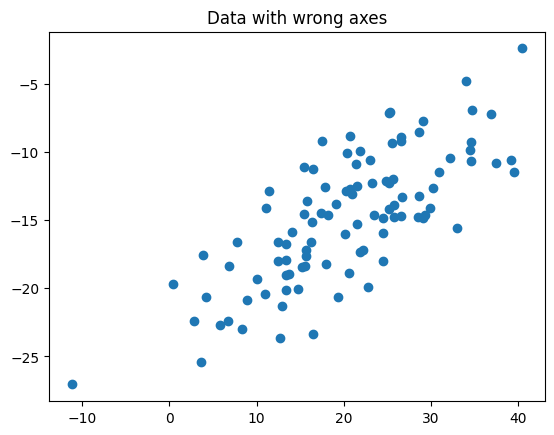

In [102]:
pca_data = [
[20.9666776351559,-13.1138080189357],
[22.7719907680008,-19.8890894944696],
[25.6687103160153,-11.9956004517219],
[18.0019794950564,-18.1989191165133],
[21.3967402102156,-10.8893126308196],
[0.443696899177716,-19.7221132386308],
[29.9198322142127,-14.0958668502427],
[19.0805843080126,-13.7888747608312],
[16.4685063521314,-11.2612927034291],
[21.4597664701884,-12.4740034586705],
[3.87655283720532,-17.575162461771],
[34.5713920556787,-10.705185165378],
[13.3732115747722,-16.7270274494424],
[20.7281704141919,-8.81165591556553],
[24.839851437942,-12.1240962157419],
[20.3019544741252,-12.8725060780898],
[21.9021426929599,-17.3225432396452],
[23.2285885715486,-12.2676568419045],
[28.5749111681851,-13.2616470619453],
[29.2957424128701,-14.6299928678996],
[15.2495527798625,-18.4649714274207],
[26.5567257400476,-9.19794350561966],
[30.1934232346361,-12.6272709845971],
[36.8267446011057,-7.25409849336718],
[32.157416823084,-10.4729534347553],
[5.85964365291694,-22.6573731626132],
[25.7426190674693,-14.8055803854566],
[16.237602636139,-16.5920595763719],
[14.7408608850568,-20.0537715298403],
[6.85907008242544,-18.3965586884781],
[26.5918329233128,-8.92664811750842],
[-11.2216019958228,-27.0519081982856],
[8.93593745011035,-20.8261235122575],
[24.4481258671796,-18.0324012215159],
[2.82048515404903,-22.4208457598703],
[30.8803004755948,-11.455358009593],
[15.4586738236098,-11.1242825084309],
[28.5332537090494,-14.7898744423126],
[40.4830293441052,-2.41946428697183],
[15.7563759125684,-13.5771266003795],
[19.3635588851727,-20.6224770470434],
[13.4212840786467,-19.0238227375766],
[7.77570680426702,-16.6385739839089],
[21.4865983854408,-15.290799330002],
[12.6392705930724,-23.6433305964301],
[12.4746151388128,-17.9720169566614],
[23.4572410437998,-14.602080545086],
[13.6878189833565,-18.9687408182414],
[15.4077465943441,-14.5352487124086],
[20.3356581548895,-10.0883159703702],
[20.7093833689359,-12.6939091236766],
[11.1032293684441,-14.1383848928755],
[17.5048321498308,-9.2338593361801],
[16.3303688220188,-15.1054735529158],
[26.6929062710726,-13.306030567991],
[34.4985678099711,-9.86199941278607],
[39.1374291499406,-10.5621430853401],
[21.9088956482146,-9.95198845621849],
[22.2367457578087,-17.2200123442707],
[10.0032784145577,-19.3557700653426],
[14.045833906665,-15.871937521131],
[15.5640911917607,-18.3396956121887],
[24.4771926581586,-14.8715313479137],
[26.533415556629,-14.693883922494],
[12.8722580202544,-21.2750596021509],
[24.4768291376862,-15.9592080959207],
[18.2230748567433,-14.6541444069985],
[4.1902148367447,-20.6144032528762],
[12.4332594022086,-16.6079789231489],
[20.5483758651873,-18.8512560786321],
[17.8180560451358,-12.5451990696752],
[11.0071081078049,-20.3938092335862],
[8.30560561422449,-22.9503944138682],
[33.9857852657284,-4.8371294974382],
[17.4376502239652,-14.5095976075022],
[29.0379635148943,-14.8461553663227],
[29.1344666599319,-7.70862921632672],
[32.9730697624544,-15.5839178785654],
[13.4211493998212,-20.150199857584],
[11.380538260355,-12.8619410359766],
[28.672631499186,-8.51866271785711],
[16.4296061111902,-23.3326051279759],
[25.7168371582585,-13.8899296143829],
[13.3185154732595,-17.8959160024249],
[3.60832478605376,-25.4023343597712],
[39.5445949652652,-11.466377647931],
[25.1693484426101,-12.2752652925707],
[25.2884257196471,-7.06710309184533],
[6.77665715793125,-22.3947299635571],
[20.1844223778907,-16.0427471125407],
[25.5506805272535,-9.33856532270204],
[25.1495682602477,-7.17350567090738],
[15.6978431006492,-17.5979197162642],
[37.42780451491,-10.843637288504],
[22.974620174842,-10.6171162611686],
[34.6327117468934,-9.26182440487384],
[34.7042513789061,-6.9630753351114],
[15.6563953929008,-17.2196961218915],
[25.2049825789225,-14.1592086208169]
]

plt.title("Data with wrong axes")
plt.scatter(*zip(*pca_data))
plt.show()

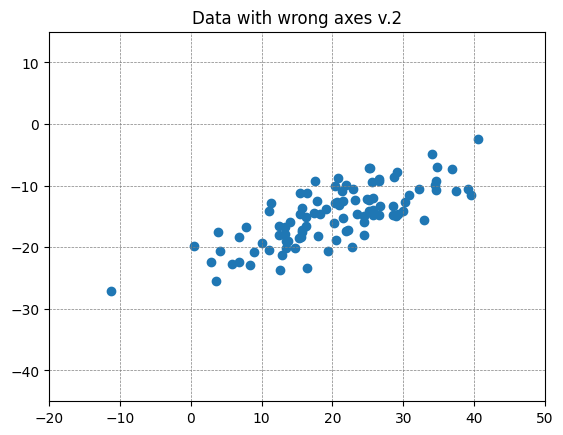

In [103]:
i = 0
xs = []
ys = []
for items in pca_data:
    xs.append(items[0])
    ys.append([items[1]])

plt.title("Data with wrong axes v.2")
plt.scatter(xs, ys)
plt.axis([-20,50,-45,15])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

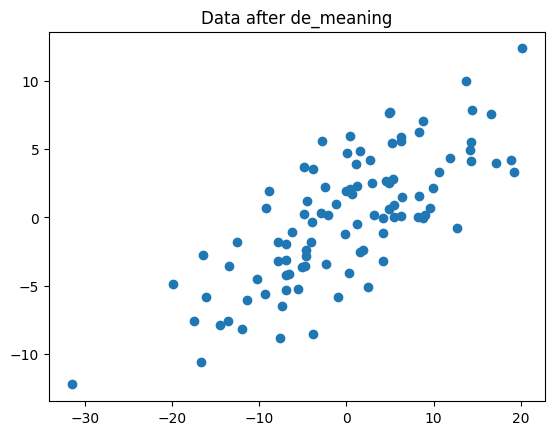

In [104]:
# Dimensionality Reduction

from ipynb.fs.full.Chapter_4 import subtract, magnitude, dot

def de_mean(data: List[Vector]) -> List[Vector]:
    """Recenters the data to have mean 0 in every dimension"""
    mean = vector_mean(data)
    return [subtract(vector, mean) for vector in data]

de_mean_data = de_mean(pca_data)
plt.title("Data after de_meaning")
plt.scatter(*zip(*de_mean_data))
plt.show()

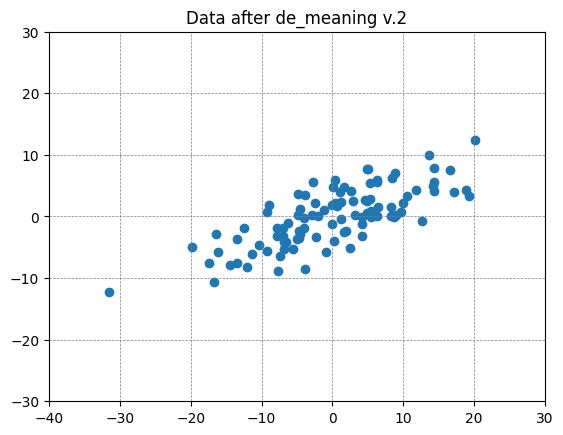

In [105]:
plt.title("Data after de_meaning v.2")
plt.scatter(*zip(*de_mean_data))
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

In [106]:
def direction(w: Vector) -> Vector:
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

def directional_variance(data: List[Vector], w: Vector) -> float:
    """
    Returns the variance of x in the direction of w
    """
    w_dir = direction(w)
    return sum(dot(v, w_dir) ** 2 for v in data)

def directional_variance_gradient(data: List[Vector], w: Vector) -> Vector:
    """
    The gradient of directional variance with respect to w
    """
    w_dir = direction(w)
    return [sum(2 * dot(v, w_dir) * v[i] for v in data) for i in range(len(w))]

dv:  10279.150840: 100%|██████████| 100/100 [00:00<00:00, 970.96it/s]


Text(0.5, 1.0, 'First principal component')

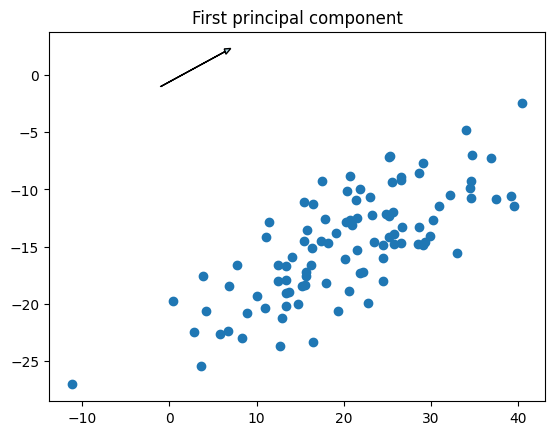

In [107]:
import random
from ipynb.fs.full.Chapter_4 import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def first_principal_component(data: List[Vector], n: int = 100, step_size: float = 0.1) -> Vector:

    # Start with a random guess
    guess = [1.0 for _ in data[0]]

    with tqdm.trange(n) as t:
        for _ in t:
            dv = directional_variance(data, guess)
            gradient = directional_variance_gradient(data, guess)
            guess = gradient_step(guess, gradient, step_size)
            t.set_description(f"dv: {dv: 3f}")

    return direction(guess)

# directional vetor of the first principal component
pca1 = first_principal_component(de_mean(pca_data))

ax = plt.axes()
ax.arrow(-1, -1.0, 8*pca1[0], 8*pca1[1],
         head_width=0.5, head_length=0.7,
         fc='lightblue', ec='black')
ax.scatter(*zip(*pca_data))
ax.set_title("First principal component")

dv:  10279.150840: 100%|██████████| 100/100 [00:00<00:00, 631.07it/s]


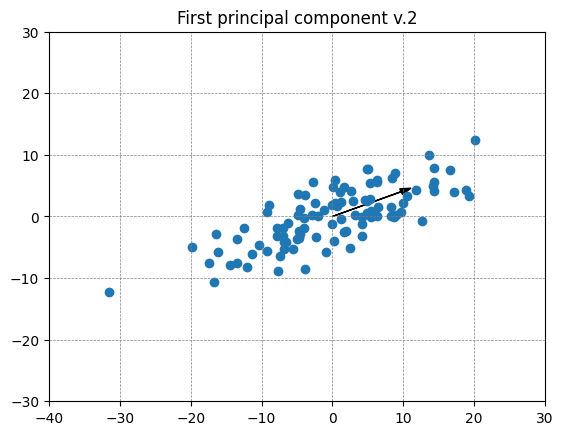

In [108]:
new_data=de_mean(pca_data)

i = 0
xs1 = []
ys1 = []
vector=first_principal_component(new_data)

for item in new_data:
  xs1.append(item[0])
  ys1.append(item[1])

plt.title("First principal component v.2")
plt.arrow(0, 0, 12*vector[0], 12*vector[1], length_includes_head=True, head_width=1,color = 'black')
plt.scatter(xs1, ys1)
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

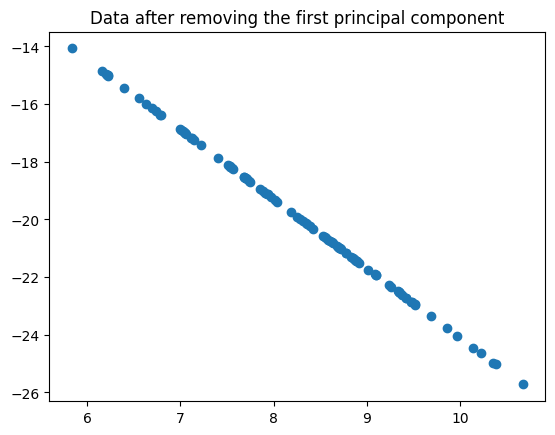

In [109]:
# First prinical component is the projection of v on the
# first principal component direction
from ipynb.fs.full.Chapter_4 import scalar_multiply

def project(v: Vector, w: Vector) -> Vector:
    """Return the projection of v onto the direction w"""
    projection_length = dot(v,w)
    return scalar_multiply(projection_length, w)

# For finding other principal components, just remove the projection of
# previous previous components from the data matrix
def remove_projection_from_vector(v: Vector, w: Vector) -> Vector:
    """projects v onto w and subtracts the projection from v"""
    return subtract(v, project(v,w))

def remove_projection(data: List[Vector], w: Vector) -> List[Vector]:
    return [remove_projection_from_vector(v, w) for v in data]

pr_data = remove_projection(pca_data, pca1)
plt.scatter(*zip(*pr_data))
plt.title("Data after removing the first principal component")
plt.show()

dv:  821.030297: 100%|██████████| 100/100 [00:00<00:00, 849.57it/s]


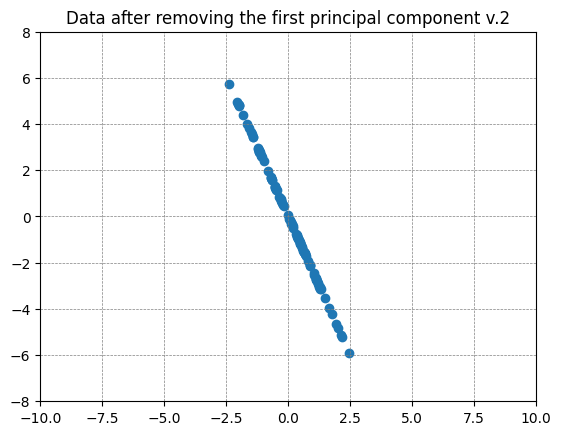

In [110]:
remove_projection1 = remove_projection(new_data, first_principal_component(new_data))

i = 0
xs1 = []
ys1 = []
vector=first_principal_component(remove_projection1)

for item in remove_projection1:
    xs1.append(item[0])
    ys1.append(item[1])

plt.title("Data after removing the first principal component v.2")
plt.scatter(xs1, ys1)
plt.axis([-10, 10, -8, 8])
plt.grid(True, linestyle = "--", color = 'gray' , linewidth = '0.5', axis='both')
plt.show()

In [111]:
## Iteratively find multiple principal components from a high-dimensional dataset
def pca(data: List[Vector], num_components: int) -> List[Vector]:
    components: List[Vector] = []
    for _ in range(num_components):
        component = first_principal_component(data)
        components.append(component)
        data = remove_projection(data, component)
    return components

def transform_vector(v: Vector, components: List[Vector]) -> Vector:
    return [dot(v,w) for w in components]

def transform(data: List[Vector], components: List[Vector]) -> List[Vector]:
    return [transform_vector(v, components) for v in data]

dv:  7408.149188: 100%|██████████| 100/100 [00:00<00:00, 919.96it/s]


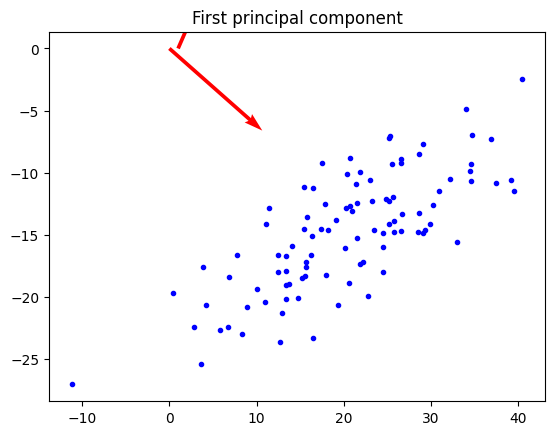

In [112]:
from ipynb.fs.full.Chapter_4 import get_column

pca_a = pca(pca_data, 2)

# plt.scatter(get_column(pca_data, 0), get_column(pca_data, 1), marker='.', color='blue')
# plt.quiver(get_column(transform(pca_a, pca_data), 0), get_column(transform(pca_a, pca_data), 1), angles='xy', scale=4, color='red')
plt.scatter(get_column(pca_data, 0), get_column(pca_data, 1), marker='.', color='blue')
plt.quiver(get_column(pca_a, 0), get_column(pca_a, 1), angles='xy', scale=4, color='red')
plt.title("First principal component")
plt.show()

dv:  821.030297: 100%|██████████| 100/100 [00:00<00:00, 1055.49it/s]


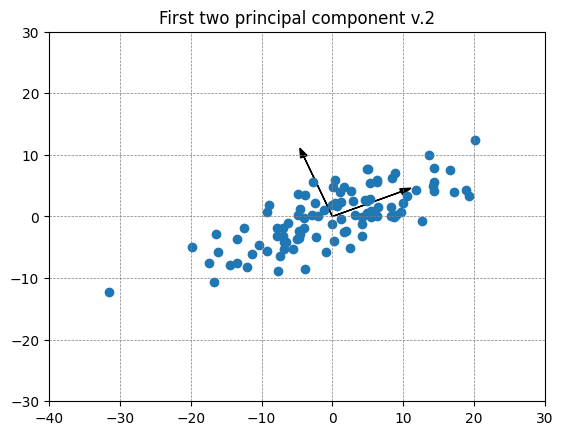

In [113]:
new_data = de_mean(pca_data)

i = 0
xs1 = []
ys1 = []
vector1 = first_principal_component(new_data)
# vector2 = pca(new_data, 2)
vector2 = first_principal_component(remove_projection(new_data, first_principal_component(new_data)))

for item in new_data:
  xs1.append(item[0])
  ys1.append(item[1])

plt.arrow(0, 0, 12*vector1[0], 12*vector1[1], length_includes_head=True, head_width=1,color = 'black')
plt.arrow(0, 0, 12*vector2[0], 12*vector2[1], length_includes_head=True, head_width=1,color = 'black')

plt.title("First two principal component v.2")
plt.scatter(xs1,ys1)
plt.axis([-40,30,-30,30])
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.show()

In [114]:
coba1 = first_principal_component(remove_projection(new_data, first_principal_component(new_data)))
coba2 = pca(new_data, 2)

assert coba1 == coba2

dv:  821.030297: 100%|██████████| 100/100 [00:00<00:00, 1020.51it/s]


AssertionError: 

In [ ]:
# Mumet uy